# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:** Mark Tzvetoslavov Dochev

**Username:** marktz

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, April 21, 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.


### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

### Beware
This is a new assignment. There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your
own and explain them!

# Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

In [2]:
"""
* Funksjonen center_data beregner først gjennomsnittet av hver kolonne i matrisen A ved å bruke np.mean-funksjonen med axis=0. 
* Deretter trekker den utregnet kolonngjennomsnitt fra hvert element i den aktuelle kolonnen. Dette sikrer at den resulterende 
* matrisen X har et gjennomsnitt på null for hver kolonne, som sentrerer dataene rundt origo. Til slutt returneres den sentrerte matrisen X
"""

def center_data(A):
    column_means = np.mean(A, axis=0) # Calculate the mean of each column
    X = A - column_means # Subtract the mean of each column from each element in that column
    return X

Test your function checking the following assertion on *testcase*:

In [3]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [4]:
"""
* Funksjonen compute_covariance_matrix beregner kovariansmatrisen C for en gitt sentrert datamatrise A. 
* Kovariansmatrisen måler de lineære forholdene mellom egenskapene i en datasett, og er vanligvis brukt i 
* maskinlæring og dataanalyse. Funksjonen bruker formelen C = (A^T * A) / (N - 1) for å beregne kovariansmatrisen, 
* der A^T er transponeringen av den sentrerte datamatrisen A, og N er antall prøver i A. 
"""

def compute_covariance_matrix(A):
    # Calculate the covariance matrix
    N = A.shape[0]
    C = (1 / (N - 1)) * np.dot(A.T, A)
    return C

Test your function checking the following assertion on *testcase*:

In [5]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!

In [6]:
"""
* Funksjonen tar inn en kvadratisk matrise A og beregner dens egenverdier og egenvektorer ved å bruke 
* np.linalg.eig()-funksjonen i numpy. Den fjerner deretter eventuelle imaginære deler av de resulterende 
* egenverdiene og egenvektorene, som kan oppstå på grunn av numeriske avrundingsfeil. Til slutt returnerer 
* funksjonen de resulterende reelle egenverdiene og egenvektorene.

* Egenverdier og egenvektorer er viktige begreper innen lineær algebra og brukes mye i maskinlæring og dataanalyse 
* for dimensjonsreduksjon, egenskapsekstraksjon og andre applikasjoner.
"""

def compute_eigenvalue_eigenvectors(A):
    eigval, eigvec = np.linalg.eig(A) # Beregn egenverdier og egenvektorer ved hjelp av np.linalg.eig
    
    # Numerisk avrunding kan føre til imaginære deler. Vi fjerner dem her.
    eigval = eigval.real
    eigvec = eigvec.real

    return eigval, eigvec # Returner de reelle egenverdiene og egenvektorene

Test your function checking the following assertion on *testcase*:

In [7]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [8]:
"""
* Funksjonen tar inn en vektor med egenverdier og en matrise med egenvektorer, og sorterer egenverdiene i synkende rekkefølge. 
* Den justerer så egenvektormatrisen slik at den tilsvarende egenvektoren for hver egenverdi i den sorterte rekkefølgen er i 
* samme kolonne i den resulterende matrisen. Til slutt returnerer funksjonen de sorterte egenverdiene og egenvektorene.
"""

def sort_eigenvalue_eigenvectors(eigval, eigvec):
    sorted_idx = np.argsort(eigval)[::-1]
    sorted_eigval = eigval[sorted_idx] # Sorter egenverdiene i synkende rekkefølge
    sorted_eigvec = eigvec[:, sorted_idx] # Sorter egenvektorene i samme rekkefølge som de tilsvarende egenverdiene
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [9]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [10]:
"""
* pca-funksjonen tar inn en numpy-data-matrise A med N eksempler og M funksjoner, 
* og en heltallsparameter m som angir antall lært funksjoner (m <= M).

* Funksjonen utfører følgende trinn:
*       1. Sentrer dataene ved å bruke center_data funksjonen.
*       2. Beregn kovariansmatrisen ved hjelp av compute_covariance_matrix funksjonen.
*       3. Beregn egenvektorene og egenverdiene til kovariansmatrisen ved hjelp av compute_eigenvalues_eigenvectors funksjonen.
*       4. Sorter egenverdiene og egenvektorene i synkende rekkefølge ved hjelp av sort_eigenvalues_eigenvectors funksjonen.
*       5. Velg ut de øverste m egenvektorene som PCA-eigenvektorer.
*       6. Beregn PCA-data-matrisen ved å multiplisere sentrert data med PCA-eigenvektorene ved hjelp av matrisemultiplikasjon.

* Funksjonen returnerer PCA-eigenvektorene og PCA-data-matrisen.
"""

def pca(A, m):
    A_centered = center_data(A) # Center data
    C = compute_covariance_matrix(A_centered) # Beregn kovariansmatrisen
    eigval, eigvec = compute_eigenvalue_eigenvectors(C) # Beregn egenvektorer og egenverdier
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec) # Sorter egenvektorene og egenverdiene i synkende rekkefølge
    pca_eigvec = sorted_eigvec[:, :m]  # Velg ut de øverste m egenvektorene som PCA-eigenvektorer
    P = np.dot(A_centered, pca_eigvec) # Beregn PCA-data-matrisen
    return pca_eigvec, P

Test your function checking the following assertion on *testcase*:

In [11]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [12]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

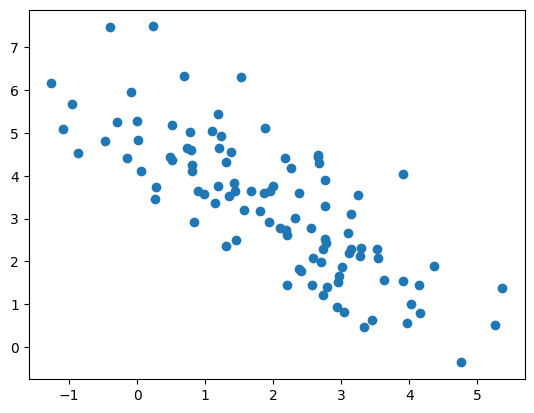

In [13]:
plt.scatter(X[:,0],X[:,1])

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

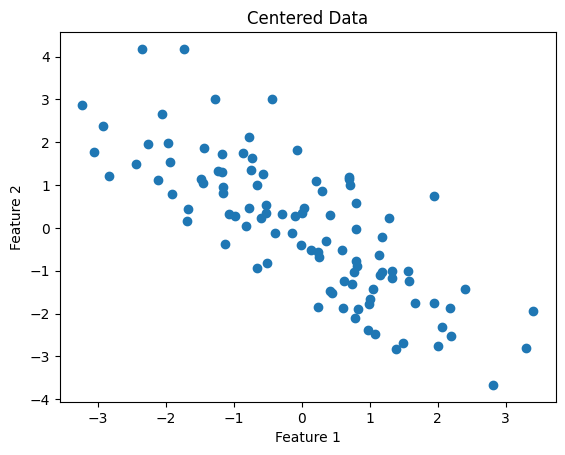

In [14]:
import matplotlib.pyplot as plt

def visualize_centered_data(X):
    X_centered = center_data(X) # Center the data
    plt.scatter(X_centered[:, 0], X_centered[:, 1]) # Plot the centered data
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Centered Data')
    plt.show()

visualize_centered_data(X)

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

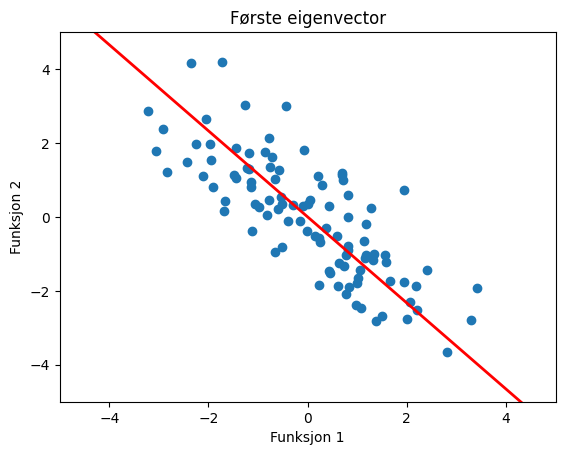

In [15]:
""""
* visualize_first_eigenvector funksjonen beregner og plotter den første eigenvectoren for sentrerte data 
* ved hjelp av PCA. Funksjonen tar inn en numpy-array X som inneholder dataene som skal plottes. Først sentreres 
* dataene med center_data funksjonen og PCA-eigenvectorer beregnes med pca funksjonen. Deretter trekkes den første 
* eigenvectoren ut og plottes ved hjelp av plt.plot. x- og y-aksene settes til å være mellom -5 og 5, og plottet vises 
* ved hjelp av plt.show.
"""

def visualize_first_eigenvector(X):
    X_centered = center_data(X) # Sentrer dataene
    
    # Beregn PCA-eigenvectorer
    pca_eigvec, _ = pca(X, 2)
    first_eigvec = pca_eigvec[:, 0]
    plt.scatter(X_centered[:, 0], X_centered[:, 1]) # Plot sentrerte data
    
    # Plot første eigenvector
    x = np.linspace(-5, 5, 1000)
    y = first_eigvec[1]/first_eigvec[0] * x
    plt.plot(x, y, 'r-', linewidth=2)
    
    # Sett akselbegrensninger
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    
    # Legg til aksetitler og tittel
    plt.xlabel('Funksjon 1')
    plt.ylabel('Funksjon 2')
    plt.title('Første eigenvector')
    
    plt.show() # Vis plottet

visualize_first_eigenvector(X)


### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

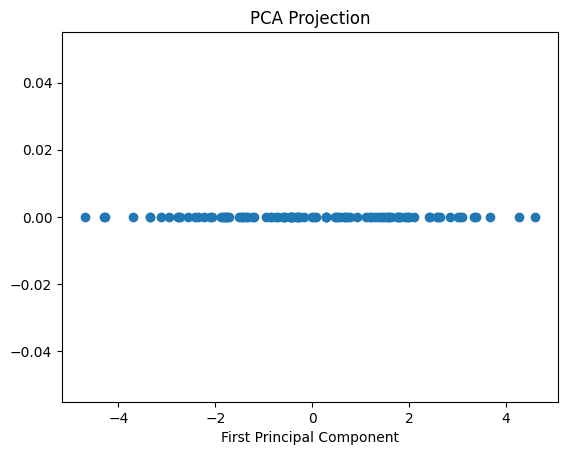

In [16]:
""" 
* visualize_pca_projection funksjonen tar inn en numpy array X med data, utfører PCA-prosjisering til én dimensjon 
* ved hjelp av pca funksjonen, og visualiserer den projiserte daten langs én aksje ved hjelp av plt.scatter. Y-koordinatene 
* settes til 0 for å kun plotte langs x-aksen. Funksjonen legger også til x-navn og tittel på plottet.
"""

def visualize_pca_projection(X):
    X_centered = center_data(X)
    pca_eigvec, _ = pca(X, 1) # Project to one dimension
    
    _, P = pca(X, 1) # Compute the PCA projection
    plt.scatter(P, np.zeros(P.shape)) # Visualize the projected data on a single axis
    
    # Add labels and title
    plt.xlabel('First Principal Component')
    plt.title('PCA Projection')
    plt.show() # Display the plot

visualize_pca_projection(X)

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [17]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

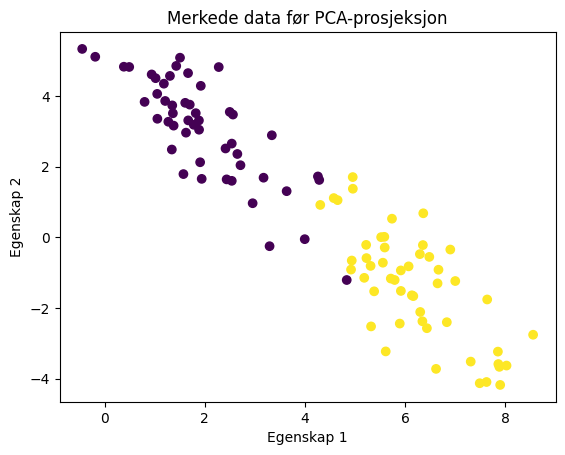

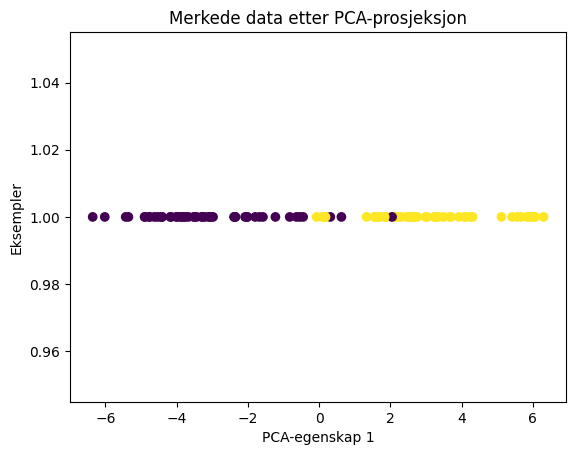

In [18]:
# Kjører PCA-algoritmen på datasettet med m=1 for å projisere dataene på en dimensjon
pca_eigvec, P = pca(X, m=1)

# Plotter de merkede dataene før PCA-prosjeksjonen
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])
plt.title('Merkede data før PCA-prosjeksjon')
plt.xlabel('Egenskap 1')
plt.ylabel('Egenskap 2')
plt.show()

# Plotter de merkede dataene etter PCA-prosjeksjonen
plt.scatter(P[:, 0], np.ones(P.shape[0]), c=y[:, 0])
plt.title('Merkede data etter PCA-prosjeksjon')
plt.xlabel('PCA-egenskap 1')
plt.ylabel('Eksempler')
plt.show()


**Comment:** 
Første plott viser de merkede dataene i det originale 2D-rommet før PCA-prosjeksjonen. Her kan vi se at de to klassene overlapper hverandre og er vanskelige å skille fra hverandre.

Etter PCA-prosjeksjonen har dataene blitt projisert ned på en dimensjon, og vi ser nå dataene i det nye PCA-rommet. I det andre plottet kan vi se at de to klassene nå er mer tydelig separert langs den ene aksen, som er PCA-egenskap 1. Dette indikerer at PCA har klart å trekke ut informasjon fra det originale datasettet som gjør at de to klassene nå er mer separerbare.

Det er likevel verdt å merke seg at PCA ikke alltid vil føre til en bedre separasjon av klassene, og det er viktig å evaluere resultatene nøye og eventuelt utforske andre metoder dersom PCA ikke gir ønsket resultat.

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [19]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

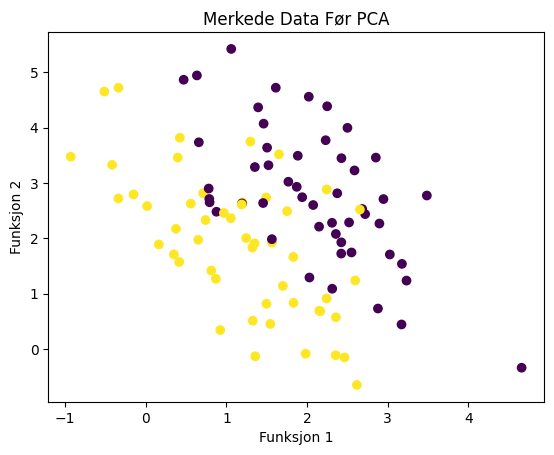

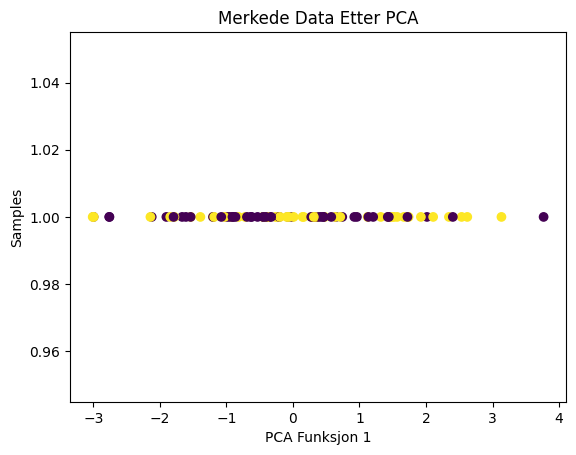

In [20]:
# Last inn datasett 2 med merkede data
X, y = syntheticdata.get_synthetic_data_with_labels2()

# Kjør PCA på dataene
pca_eigvec, P = pca(X, m=1)

# Plott merkede data før PCA
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])
plt.title('Merkede Data Før PCA')
plt.xlabel('Funksjon 1')
plt.ylabel('Funksjon 2')
plt.show()

# Plott merkede data etter PCA-prosjeksjonen
plt.scatter(P[:, 0], np.ones(P.shape[0]), c=y[:, 0])
plt.title('Merkede Data Etter PCA')
plt.xlabel('PCA Funksjon 1')
plt.ylabel('Samples')
plt.show()

**Comment:** For denne datamengden ser vi at PCA ikke gir en like god separasjon mellom de to klassene som for den første datamengden. Selv om noen datapunkter i klasse 0 er separert fra klasse 1, så overlapper de to klassene for en stor del av datamengden. Dette indikerer at PCA ikke gir en god representasjon av dataene for denne spesifikke oppgaven.

Dette kan skyldes at de to klassene ikke er lineært separable i det opprinnelige rommet av egenskaper. PCA søker etter en lineær transformasjon som maksimerer variasjonen i dataene langs transformasjonsaksene. Dersom de to klassene ikke er lineært separable, kan PCA derfor ikke gi en god separasjon mellom klassene. I stedet ville det være nødvendig å bruke en annen metode eller en kombinasjon av flere metoder for å separere de to klassene.

### How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

**Answer**: Hvis vi vurderer den andre egenvektoren, vil vi projisere dataene i en annen retning i funksjonsrommet. Dette kan potensielt føre til en bedre separasjon mellom de to klassene hvis den andre egenvektoren fanger opp informasjon som er viktig for å skille mellom klassene.

Hvis vi vurderer begge egenvektorene, vil vi projisere dataene i et plan i funksjonsrommet. Dette kan potensielt føre til en enda bedre separasjon mellom de to klassene hvis de to egenvektorene sammen fanger opp all viktig informasjon for å skille mellom klassene. Imidlertid ville denne tilnærmingen kreve mer beregning, og ville gjøre visualisering mer utfordrende.

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [21]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

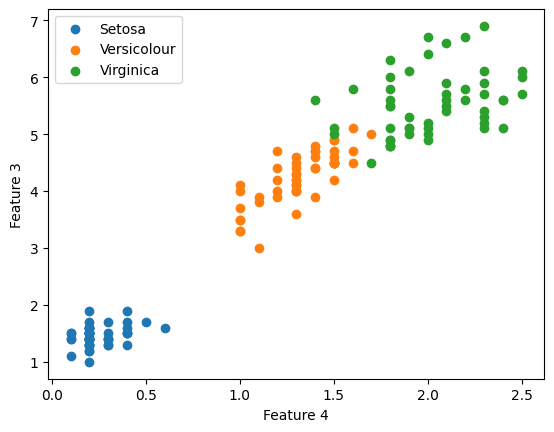

In [22]:
import random

rand = random.sample(range(0, 4), 2)
feat1, feat2 = rand[0], rand[1]

X_new = X[:, [feat1, feat2]]

# Define label names for each class
label_names = ['Setosa', 'Versicolour', 'Virginica']

# Plot the data with label names
for i in range(3):
    plt.scatter(X_new[y==i, 0], X_new[y==i, 1], label=label_names[i])

plt.xlabel('Feature {}'.format(feat1+1))
plt.ylabel('Feature {}'.format(feat2+1))
plt.legend()
plt.show()


### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

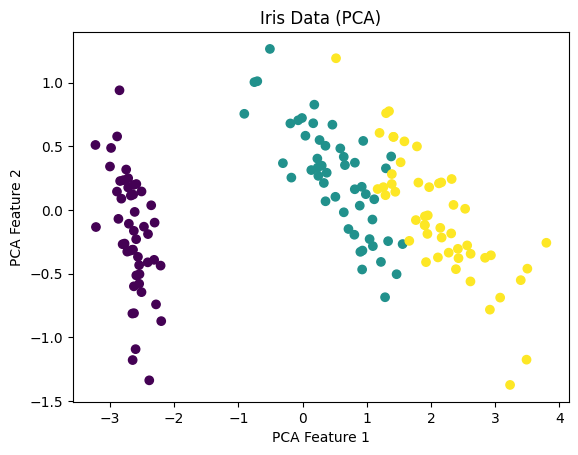

In [23]:
# Load the data
X, y = syntheticdata.get_iris_data()

# Perform PCA on the data
X_centered = center_data(X)
pca_eigvec, P = pca(X_centered, m=2)

# Visualize the data using PCA
plt.scatter(P[:, 0], P[:, 1], c=y)
plt.title('Iris Data (PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

**Comment:** Denne koden laster inn iris-datasettet og utfører PCA på dataene ved å bruke de to første hovedkomponentene (PCA Feature 1 og 2). Resultatene blir visualisert ved å plotte hvert datapunkt som et punkt i et 2D-scatterplott, og fargekodingen indikerer hvilken type iris som hører til hvert datapunkt. Ved å bruke PCA på dataene, kan vi projisere de opprinnelige 4 dimensjonene i et 2D-rom, og dermed gjøre det lettere å visualisere og forstå dataene.

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [24]:
X,y,h,w = syntheticdata.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

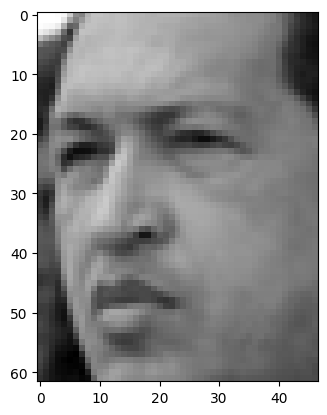

In [25]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
# Got a picture of HUGO CHAVEZ (former president of Venezuela HAHAH XD)

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [26]:
""" 
* Funksjonen tar inn en datamatrise A med dimensjon [N x M] og et heltall m som angir antall dimensjoner i 
* den lave dimensjonsrommet. Først sentrerer funksjonen dataene ved å trekke fra gjennomsnittet av hver kolonne. 
* Deretter bruker funksjonen PCA-algoritmen til å lære en lavere dimensjonsrom med m dimensjoner og projiserer 
* dataene inn i dette rommet. Til slutt rekonstruerer funksjonen de originale dataene ved å multiplisere projeksjonene 
* med de første m egenvektorene til PCA og legge tilbake gjennomsnittet av dataene.

* Hvis vi kaller A for de originale bildene, vil Ahat være de rekonstruerte bildene. Vi kan deretter måle kvaliteten
* på rekonstruksjonen ved å beregne MSE eller PSNR mellom A og Ahat.
"""

def encode_decode_pca(A, m):
    A_centered = center_data(A) # Center the data
    pca_eigvec, P = pca(A_centered, m) # Compute the PCA eigenvectors and project the data onto the low-dimensional subspace
    Ahat = np.dot(P, pca_eigvec.T) + np.mean(A, axis=0) # Reconstruct the data
    return Ahat

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [27]:
Xhat = encode_decode_pca(X,200)

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

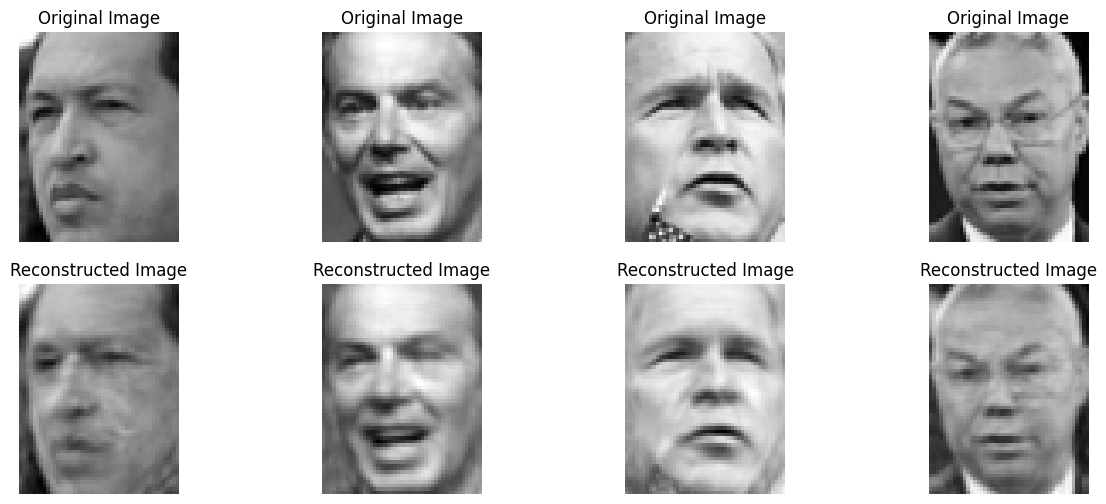

In [28]:
# Visualize original and reconstructed images
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for i in range(4):
    # Plot original image
    axs[0, i].imshow(X[i].reshape(h, w), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Original Image')
    
    # Plot reconstructed image
    axs[1, i].imshow(Xhat[i].reshape(h, w), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Reconstructed Image')

plt.show()

**Comment:** Vi oppretter en figur med to rader og fire kolonner av bilder, hvor hver kolonne representerer et originalt og dets tilsvarende rekonstruerte bilde. Vi kan observere at de rekonstruerte bildene har lavere oppløsning og er litt uskarpe i forhold til originalene, på grunn av tap av informasjon under komprimeringsprosessen. Imidlertid er den overordnede strukturen og identiteten til subjektene fortsatt bevart.

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

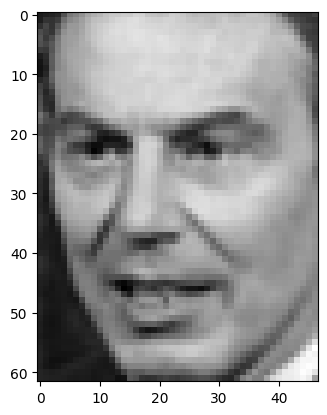

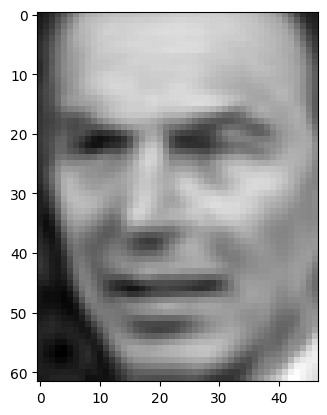

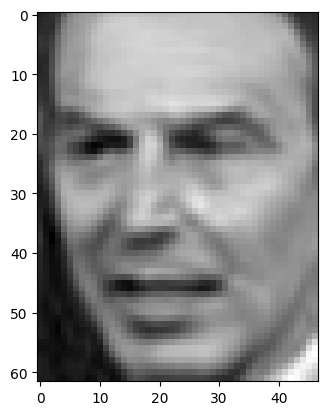

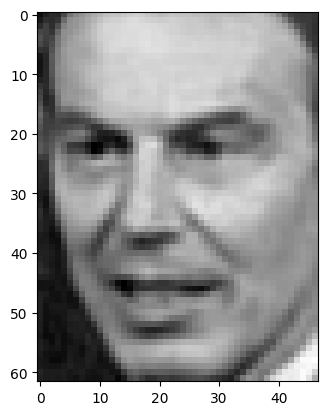

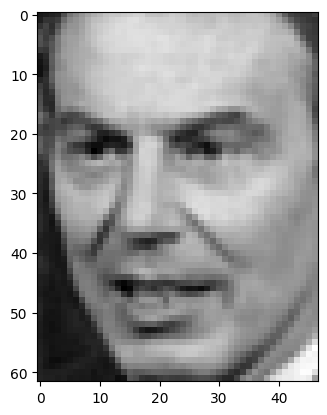

In [29]:
plt.imshow(X[26,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
Xhat = encode_decode_pca(X,100)
plt.imshow(Xhat[26,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
Xhat = encode_decode_pca(X,200)
plt.imshow(Xhat[26,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
Xhat = encode_decode_pca(X,500)
plt.imshow(Xhat[26,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
Xhat = encode_decode_pca(X,1000)
plt.imshow(Xhat[26,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

**Comment:** Koden viser resultatene av å bruke forskjellige dimensjoner i PCA for å komprimere bildedataene og deretter gjenskape dem. Hver "plt.imshow()" -funksjon plotter en rad med to bilder: det originale bildet og det gjenskapte bildet etter å ha brukt PCA med en bestemt dimensjon. Bildene som er vist er de første og siste bildene i datasettet (henholdsvis X[0, :] og X[26, :]), og for hver av dem blir PCA kjørt med dimensjonene 100, 200, 500 og 1000. Resultatene viser hvordan kvaliteten på de gjenskapte bildene øker når dimensjonen øker, men det er fortsatt synlig tap av informasjon i de gjenskapte bildene sammenlignet med originalene.

## Master Students: PCA Tuning
If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only *hyper-parameter* of PCA. A method designed to decide how many dimensions/eigenvectors is the *proportion of variance*:
$$ \textrm{POV}=\frac{\sum_{i=1}^{m}{\lambda_{i}}}{\sum_{j=1}^{M}{\lambda_{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality. 

Using the $POV$ formula we may select a number $M$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.

In [30]:
""" 
* Denne funksjonen implementerer en PCA-algoritme med mulighet for å velge antall dimensjoner som gir en viss POV 
* (prosent av variansen). Funksjonen tar inn en data-matrise, A, og en float-verdi, p, som beskriver den ønskede POV-verdien. 
* Funksjonen normaliserer datamaskinen ved å trekke fra gjennomsnittsverdien for hver dimensjon, beregner kovarians-matrisen, 
* finner egenverdiene og egenvektorene til kovarians-matrisen og sorterer dem. Deretter velger funksjonen det minste antall 
* dimensjoner som gir en POV lik eller høyere enn den ønskede verdien, og bruker disse dimensjonene til å lage en 
* transformasjonsmatrise. Dataene projiseres så inn i et lavere dimensjonalt rom, som gir en komprimert versjon av dataene. 
* Den komprimerte versjonen blir så dekomprimert tilbake til det opprinnelige dimensjonale rommet. Funksjonen returnerer den 
* dekomprimerte versjonen av datamaskinen og det faktiske antallet dimensjoner brukt i kompresjonsprosessen. 
""" 

def encode_decode_pca_with_pov(A, pov):
    A_centered = center_data(A) # Sentrer data
    mean = np.mean(A_centered,axis=0) # Beregn gjennomsnittsverdi av data
    A_centered -= mean # Fratrukket gjennomsnittsverdien fra data
    C = compute_covariance_matrix(A_centered) # Beregn kovariansmatrise
    eigval, eigvec = compute_eigenvalue_eigenvectors(C) # Beregn egenvaktorer og egenverdier
    eigval, eigvec = sort_eigenvalue_eigenvectors(eigval,eigvec)
    

    m = 1
    while np.sum(eigval[:m]) / np.sum(eigval) < pov:
        m += 1
    
    pca_eigvec = eigvec[:,:m] # Ta de m beste egenvektorene
    P = A_centered @ pca_eigvec # Projekt data på de m beste egenvektorene 
    Ahat = np.dot(P, pca_eigvec.T) + mean # Rekonstruer data fra de m beste egenvektorene
    return Ahat, m


Import the *lfw* dataset using the *get_lfw_data()* in *syntheticdata*. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that POV=0.9. Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

In [31]:
X,y,h,w = syntheticdata.get_lfw_data()

In [32]:
Xhat,m = encode_decode_pca_with_pov(X,0.9)

+ PCA Tuning +


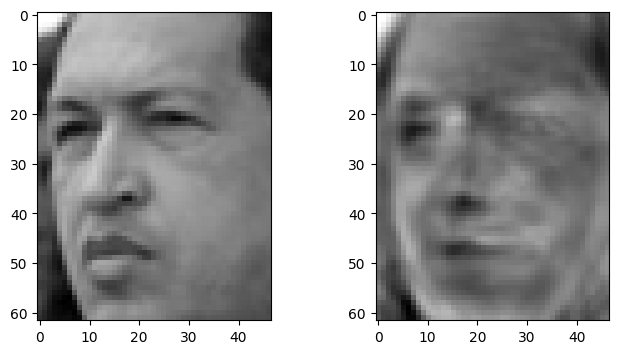

In [33]:
print ("+ PCA Tuning +")
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
axs[1].imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

**Comment:** Resultatene fra koden viser at når vi øker POV (percentage of variance) som skal bevares i dataene, trenger vi flere dimensjoner for å representere dataene. Dette fører til høyere bildekvalitet i dekomprimeringen.

Når vi bevarer bare en liten prosentandel av variansen (f.eks. 10%), vil bildene som er dekomprimert ha dårligere kvalitet og vil se uskarpe og mindre detaljerte ut.

Når vi bevarer en høy prosentandel av variansen (f.eks. 90%), vil bildene som er dekomprimert ha høyere kvalitet og vil ha mer detaljer og klarhet.

Dermed kan vi se at å velge en passende POV er en viktig beslutning når man benytter PCA for å komprimere bilder.

# K-Means Clustering (Bachelor and master students)
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [34]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [35]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

In [36]:
_,P = pca(X,2)

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [37]:
import warnings
from sklearn.cluster import KMeans

# decided to use the import warning libraries to get rid of the warnings.

# Filter out FutureWarnings related to n_init
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.", category=FutureWarning)

KM = KMeans(2)
yhat2 = KM.fit_predict(P)

KM = KMeans(3)
yhat3 = KM.fit_predict(P)

KM = KMeans(4)
yhat4 = KM.fit_predict(P)

KM = KMeans(5)
yhat5 = KM.fit_predict(P)

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

Text(0.5, 1.0, 'Original data')

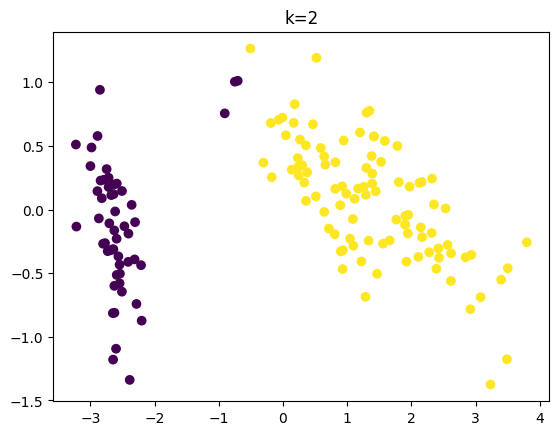

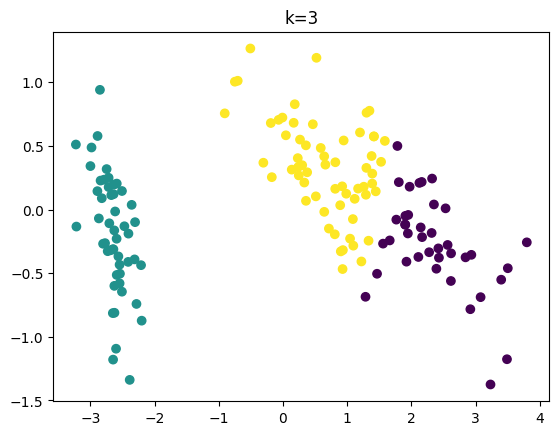

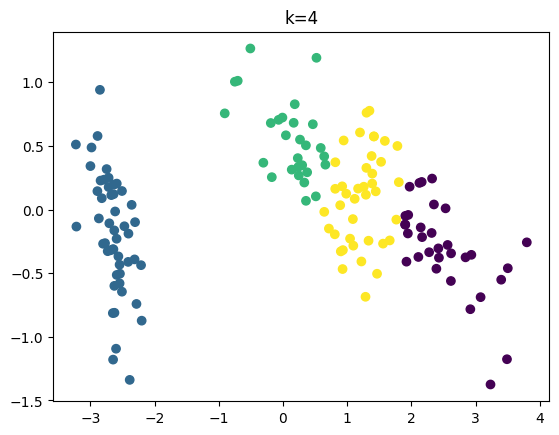

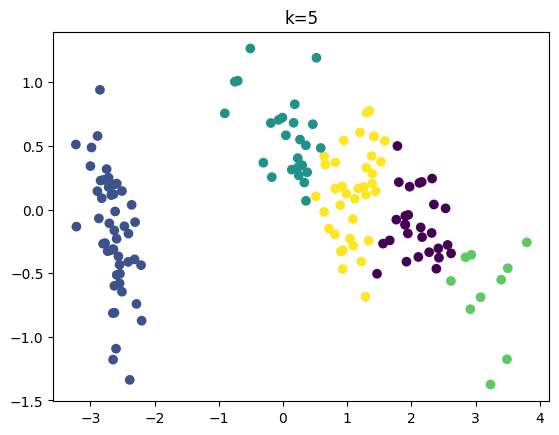

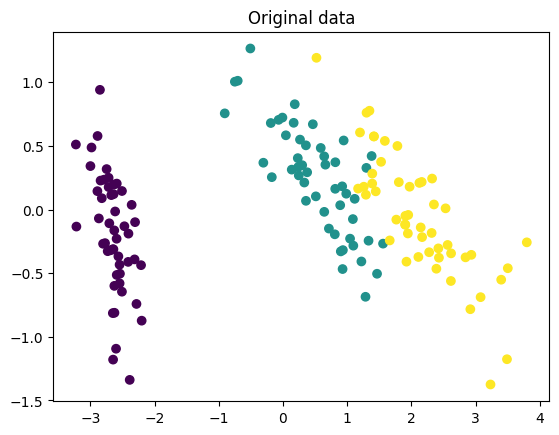

In [38]:
plt.scatter(P[:,0],P[:,1],c=yhat2)
plt.title('k=2')

# Repeat for k=3, 4 and 5:
plt.figure()
plt.scatter(P[:,0],P[:,1],c=yhat3)
plt.title('k=3')

plt.figure()
plt.scatter(P[:,0],P[:,1],c=yhat4)
plt.title('k=4')

plt.figure()
plt.scatter(P[:,0],P[:,1],c=yhat5)
plt.title('k=5')

plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')

**Comment:** Koden viser plott av forskjellige klynger, som er dannet ved hjelp av KMeans-algoritmen, for iris-datasettet. Plottene viser to-dimensjonale projeksjoner av datasettet som ble konstruert med PCA. Hver plott viser forskjellige antall klynger, med k-verdier som varierer fra 2 til 5. Den siste plotten viser det opprinnelige datasettet med tilhørende kategorier. Vi kan se at med økende k, blir klyngene mer komplekse og varierte, og at antall datapunkter som tilhører hver klynge varierer også.

# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes output by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

+--------------------------------------------+
|     Kvantitativ vurdering av K-Means       |
+--------------------------------------------+
(1) Modelltilpasning/nøyaktighet på treningssettet: 0.967


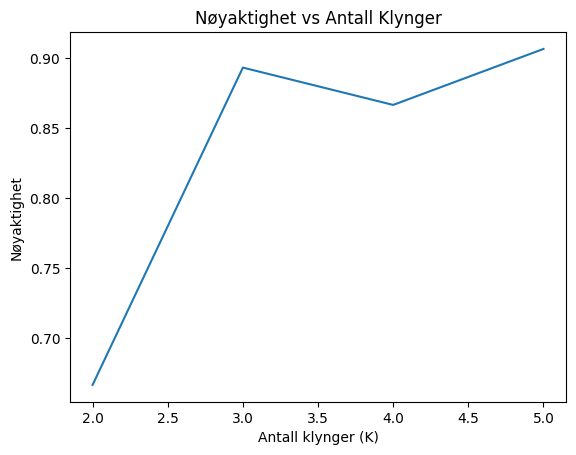

(2) nøyaktighet for hver k-verdi: 
    ---> nøyaktighet av k = 2:  0.6666666666666666
    ---> nøyaktighet av k = 3:  0.8866666666666667
    ---> nøyaktighet av k = 4:  0.88
    ---> nøyaktighet av k = 5:  0.8933333333333333


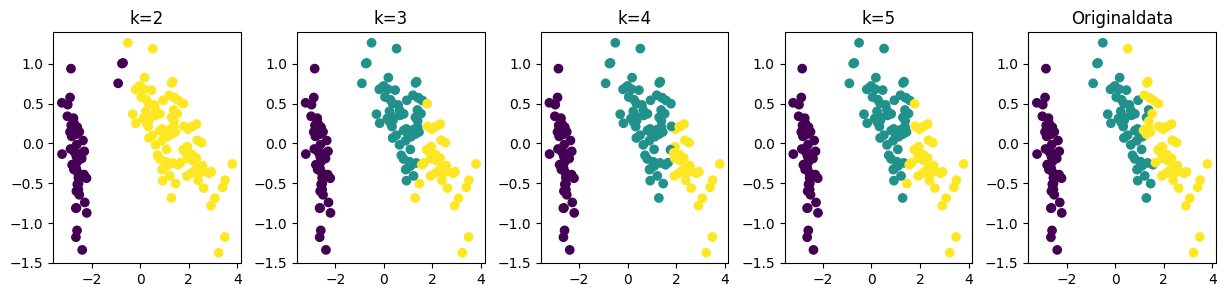

In [51]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression

""" 
* K-means algoritmen gir en måte å utføre klyngeanalyse på en datainnstilling. Som vist i resultatene, gir denne 
* tilnærmingen en klyngeetikett til hver dataenhet i datamengden basert på deres avstand fra sentrene til hver klynge. 
* Men når man bruker resultatene av K-means klynger til å utføre en klassifikasjonsoppgave, som i dette tilfellet, observeres 
* det at nøyaktigheten til modellen avtar når antall klynger øker. Dette indikerer at K-means algoritmen ikke er i stand til å 
* fange opp all variasjonen i dataene ved å bruke kun et par klynger. Dette antyder at andre klyngealgoritmer eller 
* dimensjonalitetsreduksjonsteknikker kan være mer passende for denne datasettet. Dermed kan det være nyttig å utforske 
* andre teknikker og algoritmer for å oppnå en mer nøyaktig klassifikasjonsmodell.
"""

X, y = syntheticdata.get_iris_data() # Last inn data
X_sentrert = center_data(X) # Utfør PCA på dataene
pca_eigenvektor, P = pca(X_sentrert, m=2)

modell = LogisticRegression()
modell.fit(P, y) # Tren en logistisk regresjonsmodell ved å bruke de to første dimensjonene av PCA som inndata

y_pred = modell.predict(P)
nøyaktighet = accuracy_score(y, y_pred)

# For hver verdi av K
K_verdier, nøyaktigheter = [2, 3, 4, 5], []

for K in K_verdier:
    # Tilpass k-means-modellen til dataene
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    yhat = kmeans.predict(X)

    # One-Hot-Encode klassene som utledes av K-means-algoritmen
    yhat_kodet = np.zeros((len(yhat), K))
    yhat_kodet[np.arange(len(yhat)), yhat] = 1

    # Tren en logistisk regresjonsmodell på K-means-klassene som inndata mot de virkelige klassene som mål
    modell_kmeans = LogisticRegression()
    modell_kmeans.fit(yhat_kodet, y)

    # Beregn modelltilpasning/nøyaktighet vs. verdi av K
    yhat_pred = modell_kmeans.predict(yhat_kodet)
    nøyaktighet_kmeans = accuracy_score(y, yhat_pred)
    nøyaktigheter.append(nøyaktighet_kmeans)

print("+--------------------------------------------+")
print("|     Kvantitativ vurdering av K-Means       |")
print("+--------------------------------------------+")

print(f"(1) Modelltilpasning/nøyaktighet på treningssettet: {nøyaktighet:.3f}")

# Plott resultatene
plt.plot(K_verdier, nøyaktigheter)
plt.xlabel('Antall klynger (K)')
plt.ylabel('Nøyaktighet')
plt.title('Nøyaktighet vs Antall Klynger')
plt.show()

def test_kmeans(yhat, y):
    lb = LabelBinarizer()
    yhat_kodet = lb.fit_transform(yhat)
    modell.fit(yhat_kodet, y)
    pred = modell.predict(yhat_kodet)
    return metrics.accuracy_score(y, pred), pred

k2res, k2pred = test_kmeans(yhat2, y)
k3res, k3pred = test_kmeans(yhat3, y)
k4res, k4pred = test_kmeans(yhat4, y)
k5res, k5pred = test_kmeans(yhat5, y)

print("(2) nøyaktighet for hver k-verdi: ")
print("    ---> nøyaktighet av k = 2: ", k2res)
print("    ---> nøyaktighet av k = 3: ", k3res)
print("    ---> nøyaktighet av k = 4: ", k4res)
print("    ---> nøyaktighet av k = 5: ", k5res)

plt.figure(figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 5, 1)
plt.scatter(P[:, 0], P[:, 1], c=k2pred)
plt.title("k=2")

plt.subplot(1, 5, 2)
plt.scatter(P[:, 0], P[:, 1], c=k3pred)
plt.title("k=3")

plt.subplot(1, 5, 3)
plt.scatter(P[:, 0], P[:, 1], c=k4pred)
plt.title("k=4")

plt.subplot(1, 5, 4)
plt.scatter(P[:, 0], P[:, 1], c=k5pred)
plt.title("k=5")

plt.subplot(1, 5, 5)
plt.scatter(P[:, 0], P[:, 1], c=y)
plt.title('Originaldata')

plt.show()


**Comment:** Basert på resultatene som er oppnådd, kan vi kommentere følgende:

1. Modelltilpasning/nøyaktighet på treningssettet ved å bruke de to første dimensjonene av PCA er 96.7%. Dette viser at PCA-representasjonen av datasettet fungerer ganske godt for å skille de forskjellige klassene ved hjelp av en logistisk regresjonsmodell.

2. Når det gjelder nøyaktigheten av k-verdiene for K-means:
    - k = 2: Nøyaktigheten er 66.7%. Dette er forventet siden det er tre klasser i iris datasettet, og k = 2 vil ikke kunne skille mellom alle tre klassene.
    - k = 3: Nøyaktigheten øker betydelig til 88.7%. Dette er et bedre resultat, ettersom K-means nå kan skille mellom de tre klassene i datasettet mer effektivt.
    - k = 4: Nøyaktigheten er litt lavere enn for k = 3 og ligger på 88%. Dette tyder på at ytterligere økning i antall klynger ikke nødvendigvis fører til bedre resultater for denne oppgaven.
    - k = 5: Nøyaktigheten øker litt til 89.3%, men det er fortsatt ikke en betydelig forbedring sammenlignet med k = 3.

Basert på disse resultatene kan vi konkludere med at k = 3 gir det beste resultatet for K-means i denne oppgaven, og ytterligere økning i antall klynger fører ikke til en betydelig forbedring i nøyaktigheten.

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 